In [ ]:
This is a study that calculates carbon dioxide emissions of the urban area by using the satellite's greenhouse gas observations.
I used column-averaged of carbon dioxide(XCO2) of OCO-2 and vertical column densities (VCDs) of tropospheric NO2 of TROPOMI. 
In urban areas, greenhouse gases are emitted directly from transportation and heating. 
The concentration of GHG is distrinuted in the form of plume, which decreases in value as they move farther away from urban areas. 

NO2's lifetime(few hours) is much shorter than that of CO2(hundreds of years), making it easier to identify the source. 
Also, NO2 is co-emitted with CO2 during combustion, so the source of CO2 can be determined.
This study uses CO2 and NO2 observations at the same time over Seoul domain to obtain CO2 emissions in urban areas and compare them with existing inventory data.
While inventory yields emissions by a bottom-up method, which is time-consuming and costly, 
it is simpler to produce emissions by a top-down method with satellite observations such as this study.

This study was conducted using the same method as the paper below.
(https://doi.org/10.5194/acp-19-9371-2019)

In [19]:
# find which overpass pass trough Seoul #

import numpy as np
import glob
from netCDF4 import Dataset as D
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Seoul domain #
lon_min, lon_max = 126, 128
lat_min, lat_max = 36.5, 38.5

fname = '/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200318_B10206Ar_200728195242s.nc4'
f = D(fname, 'r')
lon_oco = f.variables['longitude'][:]
lat_oco = f.variables['latitude'][:]
xco2 = f.variables['xco2'][:]
flag = f.variables['xco2_quality_flag'][:] ####  0=Good, 1=Bad
idx = np.where((lon_oco > lon_min) & (lon_oco < lon_max) & (lat_oco > lat_min) & (lat_oco < lat_max) & (flag == 0))

###OCO-2 file list###
fpath = '/home/DATA_ARCHIVE/OCO2_V10r/2020/'
flist = glob.glob(fpath + '*')

fpath = '/home/xodpwkd/plume_detection/image/'
### Find oco2 overpass over Seoul ###
for fname in flist :
    f = D(fname, 'r')
    lon_oco = f.variables['longitude'][:]
    lat_oco = f.variables['latitude'][:]
    xco2 = f.variables['xco2'][:]
    flag = f.variables['xco2_quality_flag'][:] ####  0=Good, 1=Bad
    idx = np.where((lon_oco > lon_min) & (lon_oco < lon_max) & (lat_oco > lat_min) & (lat_oco < lat_max) & (flag == 0))
    if len(idx[0]) != 0 : 
        print(fname)
        print(lon_oco[idx].shape)                
        ax = plt.figure()
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines(zorder=1)
        ax.set_extent([122,131.1,43,33])
        plt.scatter(lon_oco[idx], lat_oco[idx], c = xco2[idx], s=5, cmap='Reds')
        plt.colorbar(label='XCO2 (ppm)')
        plt.xlim(lon_min, lon_max)
        plt.ylim(lat_min, lat_max)
        plt.xticks(np.arange(lon_min, lon_max +1, 1))
        plt.yticks(np.arange(lat_min, lat_max +1, 1))
        plt.title('%s'%(fname[34:51]))
        plt.savefig(fpath + '%s'%(fname[34:51]))
        plt.clf()

/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200201_B10206Ar_200728200603s.nc4
(23,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200203_B10206Ar_200728200909s.nc4
(29,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200304_B10206Ar_200728193932s.nc4
(14,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200318_B10206Ar_200728195242s.nc4
(1195,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200405_B10206Ar_200728191140s.nc4
(646,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200407_B10206Ar_200728191328s.nc4
(23,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200414_B10206Ar_200728191959s.nc4
(222,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200507_B10206Ar_200728184016s.nc4
(103,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200608_B10206Ar_200720201614s.nc4
(26,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200914_B10206Ar_201019234511s.nc4
(7,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200820_B10206Ar_200908230900s.nc4
(2,)
/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_201009_B10206Ar_2

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/xodpwkd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


Text(0.5, 1.0, '20200405')

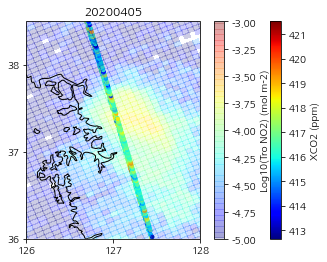

In [1]:
# plot the overpass over Seoul (pale color in the backgroud : XNO2, bright color in the line : XCO2)#

import numpy as np
import glob
from netCDF4 import Dataset as D
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

lon_min, lon_max = 126, 128
lat_min, lat_max = 36, 38.5

####plot XCO2 of OCO-2 ####
fname = '/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_200405_B10206Ar_200728191140s.nc4'
#fname = '/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_201217_B10206Ar_210111003817s.nc4'
#fname = '/home/DATA_ARCHIVE/OCO2_V10r/2020/oco2_LtCO2_201219_B10206Ar_210111003844s.nc4'
f = D(fname, 'r')
lon_oco = f.variables['longitude'][:]
lat_oco = f.variables['latitude'][:]
xco2 = f.variables['xco2'][:]
flag = f.variables['xco2_quality_flag'][:] ####  0=Good, 1=Bad
idx = np.where((lon_oco > lon_min) & (lon_oco < lon_max) & (lat_oco > lat_min) & (lat_oco < lat_max) & (flag == 0))

ax = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(zorder=1)
ax.set_extent([122,131.1,43,33])
plt.scatter(lon_oco[idx], lat_oco[idx], c = xco2[idx], s=10, cmap='jet')
plt.colorbar(label='XCO2 (ppm)')

####plot NO2 TROPOMI ####
fpath = '/home/DATA_ARCHIVE/TROPOMI_HiR/NO2/2020/'
flist = glob.glob(fpath + '*NO2____20200405T03*')
fname = flist[0]
f = D(fname, 'r')
var = f.groups['PRODUCT'].variables
lon_tro = var['longitude'][:][0,:,:]
lat_tro = var['latitude'][:][0,:,:]
no2 = var['nitrogendioxide_tropospheric_column'][:][0,:,:] #masked data
no2 = no2.filled(np.nan)
flag = var['qa_value'][0] 
idx_tro = np.where((lon_tro > lon_min) & (lon_tro < lon_max) & (lat_tro > lat_min) & (lat_tro < lat_max) & (flag > 0.75)) # 30% belongs for flag > 0.75
no2[flag<=0.75] = np.nan
no2[~np.isnan(no2)] = np.log10(no2[~np.isnan(no2)])

plt.pcolormesh(lon_tro,lat_tro,no2, alpha=0.2, cmap='jet', vmin=-5, vmax =-3)
plt.colorbar(label = 'Log10(Tro NO2) (mol m-2)')

plt.scatter(125.745203, 39.020914, marker='*', s=100)

plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.xticks(np.arange(lon_min, lon_max +1, 1))
plt.yticks(np.arange(lat_min, lat_max, 1))
fpath = '/home/xodpwkd/plume_detection/image/'
plt.savefig(fpath + '%s'%(fname[60:68]))
plt.title('%s'%(fname[60:68]))

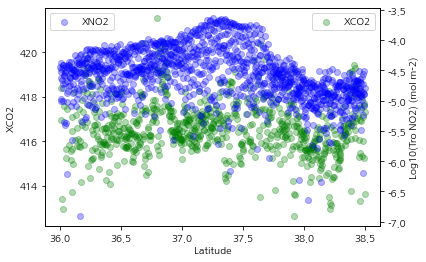

In [2]:
# plot the scatter plot of XCO2, XNO2 #

fig, ax1 = plt.subplots()
ax1.scatter(lat_oco[idx], xco2[idx], color='green', alpha= 0.3, label='XCO2')
ax1.set_ylabel('XCO2')
ax1.legend(loc="upper right")
ax1.set_xlabel('Latitude')

ax2 = ax1.twinx()
ax2.scatter(lat_tro[idx_tro], no2[idx_tro], color='blue', alpha=0.3, label='XNO2')
ax2.set_ylabel('Log10(Tro NO2) (mol m-2)')
ax2.legend(loc="upper left")

[ 0.96324899 -0.1557044   0.57046323 37.19962933  1.11885185]
[ 4.19870555e+02 -9.78994778e-02  7.35387688e-01  3.70406551e+01]


Text(0.5, 1.0, 'XCO2_XNO2_20201217')

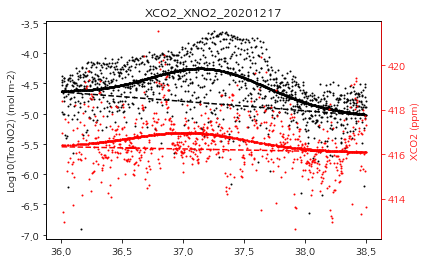

In [3]:
# plot the gaussian function of XCO2 & XNO2 #

from scipy.optimize import curve_fit
import math

def func2(x, a0, a1) :
    a0 = popt[0]
    a1 = popt[1]
    return a0 + a1*x

def func(x, a0, a1, a2, a3, a4):
    return a0 + a1*x + a2*np.exp(-4*np.log(2)*(x-a3)**2*a4**(-2))

initial_guess = [-1.05474694, -0.07482038,  1.00000000e+00,  37,  1.00000000e+00]
x = lat_tro[idx_tro][~np.isnan(no2[idx_tro])]
y = no2[idx_tro][~np.isnan(no2[idx_tro])]
popt, pcov = curve_fit(func, x, y, p0 = initial_guess) # [-2.34221007, -0.04848778,  0.64383929, 37.21826964,  1.13989096]
fig, ax1 = plt.subplots()
ax1.set_ylabel('Log10(Tro NO2) (mol m-2)')
ax1.scatter(x,y, s=1, color = 'black')
ax1.scatter(x, func(x, *popt), s=1, color = 'black')
a0, a1, a2, a3, a4 = popt[0], popt[1], popt[2], popt[3], popt[4]
ax1.plot(x, a0 + a1*x, color = 'black', linestyle = '--')
print(popt)

def func(x, a0, a1, a2, a3):    
    return a0 + a1*x + a2*np.exp(-4*np.log(2)*(x-a3)**2*a4**(-2))

initial_guess = [4.18704887e+02, -6.04499230e-02,  1.00000000e+00,  37]
x = lat_oco[idx]
y = xco2[idx]
popt, pcov = curve_fit(func, x, y, p0=initial_guess) #[ 425.784718, -0.292501620,  3.06621889,  37.2620661, 1.13989096]
a5, a6, a7, a8 = popt[0], popt[1], popt[2], popt[3]
ax2 = ax1.twinx()
ax2.scatter(x,y, s=1, color = 'red')
ax2.scatter(x, func(x, *popt), s=1, color = 'red')
a0, a1 = popt[0], popt[1]
ax2.plot(x, a0 + a1*x, color = 'red', linestyle = '--')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel('XCO2 (ppm)')
plt.xlabel('Latitude')
print(popt)

plt.title('XCO2_XNO2_20201217')
#plt.savefig('XCO2_XNO2_20201217')

In [4]:
fpath = '/home/DATA_ARCHIVE/ERA5/HOURLY/single_wind/'
f = D(fpath + 'ERA5_wind_single_202004.nc','r')
u10 = f.variables['u10']
v10 = f.variables['v10']
time = f.variables['time']
ve = (u10[99,210,508]**2 + v10[99,210,508]**2)**0.5 # 3.0493 m/s in this case

F = 0.53*a4*111*a7*ve # Flux over domain; MtCO2/area
print(F)

# Estimated emission of GHG in urban area from inventory, 2017 : 118 MtCO2/a 
# F is similar with the emission from inventory!

147.60155116044683
